# 연비에 어떤것들이 영향을 주는지 다중회귀분석을 통해 알아보자!

In [1]:
import pandas
from numpy import nan
from matplotlib import pyplot
import seaborn

In [2]:
df = pandas.read_csv('auto-mpg.csv', header=None) 
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
              'model year', 'origin', 'name']

df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
# 결측치 처리 후 타입 실수로 변환
df.horsepower = df.horsepower.replace('?',nan)
df.dropna(subset = ['horsepower'],axis=0, inplace=True)
df.horsepower = df.horsepower.astype('float')

In [4]:
df['model year'] = df['model year'] + 1900

## 필요한 변수만 추출
- 종속변수 : 'mpg'
- 독립변수 : 'cylinders','horsepower','weight'

In [24]:
ndf = df[['mpg','cylinders','horsepower','weight']]
x = ndf[['cylinders','horsepower','weight']]
y = ndf['mpg']

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((274, 3), (118, 3), (274,), (118,))

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 학습
lr.fit(x_train, y_train)

# 학습시킨 것 결정계수 출력 : 0.6834672207327723
lr.score(x_test, y_test)

# 3개 독립변수의 기울기 : array([-0.50458132, -0.02971374, -0.0055161 ])
lr.coef_

# y절편 : 45.526841849786834
lr.intercept_

45.90478663458812

c:\users\hk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hk\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


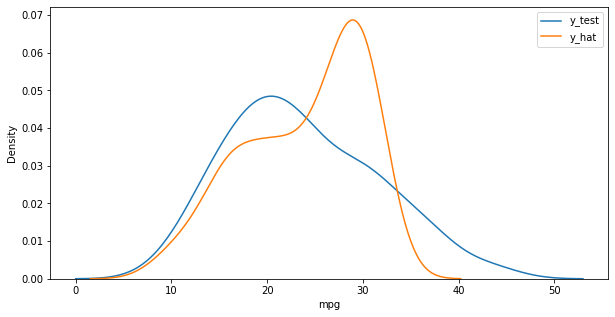

In [27]:
y_hat = lr.predict(x_test)

pyplot.figure(figsize = (10,5))
ax1 = seaborn.distplot(y_test, hist=False, label = 'y_test')
ax2 = seaborn.distplot(y_hat, hist=False, label = 'y_hat', ax=ax1)
pyplot.legend(loc='best')